# **Data Analytics and Visualization Project**



# ***Improving Learning in Dyslexic Children***

# ***Data Downloading and Cleaning***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import urllib.request
import tarfile
import numpy as np

In [ ]:
dataset_url = "https://cs.stanford.edu/~acoates/stl10/stl10_binary.tar.gz"


In [ ]:
data_dir = "./stl10_data"


In [ ]:
def download_and_extract_dataset(url, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    file_path = os.path.join(save_dir, "stl10_binary.tar.gz")
    urllib.request.urlretrieve(url, file_path)
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=save_dir)
    os.remove(file_path)

In [ ]:
download_and_extract_dataset(dataset_url, data_dir)


In [ ]:
from skimage.color import rgb2gray


In [ ]:
data_dir = "./stl10_data"
data = np.fromfile(os.path.join(data_dir, "stl10_binary/unlabeled_X.bin"), dtype=np.uint8)
data = np.reshape(data, (-1, 3, 96, 96))
data = np.transpose(data, (0, 3, 2, 1))


# **Display Dataset Features**

In [ ]:
import pandas as pd


In [ ]:
flattened_data = data.reshape(data.shape[0], -1)
df = pd.DataFrame(flattened_data)

print("Features of the dataset:")
print(df)

Features of the dataset:
       0      1      2      3      4      5      6      7      8      9      \
0        126    128    129    144    138    142    150    153    154    126   
1        119    115    123    138    132    135    165    162    162    165   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995      0      0      0      0      0      0      0      0      0      0   
99996     71     54     62    102     85     88    127    106    107    126   
99997    177    178    206    177    178    206    177    178    206    177   
99998     98    150    155     85    141    145     98    156    156    126   
99999    191    175    132    201    184    136    185    167    127    189   

       ...  27638  27639  

# **Removing Low Variance Features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold


In [ ]:
flattened_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
selector = VarianceThreshold()

cleaned_data = selector.fit_transform(flattened_data)


In [ ]:
import numpy as np
import os
!pip install numpy

data_dir = "./stl10_data"
data = np.fromfile(os.path.join(data_dir, "stl10_binary/unlabeled_X.bin"), dtype=np.uint8)
data = np.reshape(data, (-1, 3, 96, 96))
data = np.transpose(data, (0, 3, 2, 1))


In [ ]:
flattened_data = data.reshape(data.shape[0], -1)


# ***Data Manipulation ***

# 1. Color Histogram Features

In [ ]:
import cv2


In [ ]:
import numpy as np
import os
!pip install numpy

data_dir = "./stl10_data"
data = np.fromfile(os.path.join(data_dir, "stl10_binary/unlabeled_X.bin"), dtype=np.uint8)
data = np.reshape(data, (-1, 3, 96, 96))
data = np.transpose(data, (0, 3, 2, 1))

In [ ]:
color_histograms = []
for image in data:
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    color_histograms.append(hist)

color_histograms = np.array(color_histograms)


In [ ]:
manipulated_data_path = os.path.join(data_dir, "manipulated_stl10_data_1.npy")
np.save(manipulated_data_path, color_histograms)

print("Data manipulation completed. Manipulated features saved at:", manipulated_data_path)

Data manipulation completed. Manipulated features saved at: ./stl10_data/manipulated_stl10_data_1.npy


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

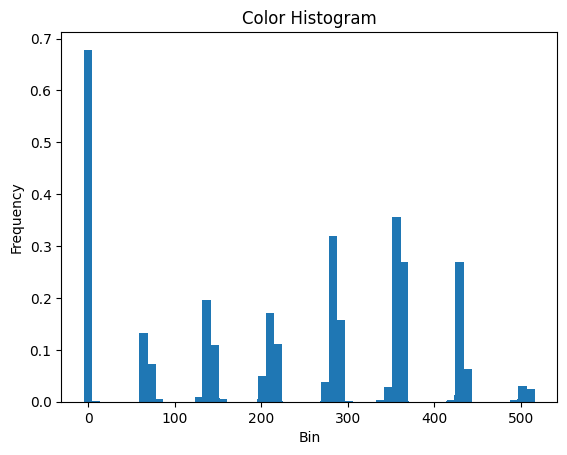

In [ ]:
image_index = 0
histogram = color_histograms[image_index]

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=10.0)
ax.set_xlabel('Bin')
ax.set_ylabel('Frequency')
ax.set_title('Color Histogram')
plt.show()

# **Dimensionality Modeling**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

manipulated_data_path = './stl10_data/manipulated_stl10_data_1.npy'
manipulated_features = np.load(manipulated_data_path)

# Applying PCA to reduce dimensionality
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(manipulated_features)


In [ ]:
# Clustering the reduced data
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_avg = silhouette_score(reduced_features, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.1591092


In [ ]:
cluster_centers = kmeans.cluster_centers_


In [ ]:
clustered_labels_path = os.path.join(data_dir, "clustered_labels.npy")
np.save(clustered_labels_path, cluster_labels)

print("Clustering completed. Clustered labels saved at:", clustered_labels_path)

Clustering completed. Clustered labels saved at: ./stl10_data/clustered_labels.npy


# **Features of Clustered Categories**

In [ ]:
manipulated_data_path = os.path.join(data_dir, "manipulated_stl10_data_1.npy")
clustered_labels_path = os.path.join(data_dir, "clustered_labels.npy")
manipulated_features = np.load(manipulated_data_path)
cluster_labels = np.load(clustered_labels_path)


In [ ]:
cluster_info = pd.DataFrame(columns=['Cluster', 'Number of Images'])


In [ ]:
for cluster in np.unique(cluster_labels):
    num_images = np.sum(cluster_labels == cluster)
    cluster_info = cluster_info.append({'Cluster': cluster, 'Number of Images': num_images}, ignore_index=True)

<ipython-input-36-151e9d811801>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({'Cluster': cluster, 'Number of Images': num_images}, ignore_index=True)
<ipython-input-36-151e9d811801>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({'Cluster': cluster, 'Number of Images': num_images}, ignore_index=True)
<ipython-input-36-151e9d811801>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({'Cluster': cluster, 'Number of Images': num_images}, ignore_index=True)
<ipython-input-36-151e9d811801>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [ ]:
print("Cluster Information:")
print(cluster_info)
print()

Cluster Information:
  Cluster Number of Images
0       0            30151
1       1             8190
2       2             3967
3       3            11022
4       4             6461
5       5             9074
6       6             7468
7       7             8110
8       8             8695
9       9             6862



In [ ]:
num_features_to_display = 5
feature_names = [f"Feature_{i+1}" for i in range(manipulated_features.shape[1])]
representative_features = pd.DataFrame(columns=feature_names)

In [ ]:
for cluster in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    cluster_features = manipulated_features[cluster_indices]
    mean_features = np.mean(cluster_features, axis=0)
    representative_features = representative_features.append(pd.Series(mean_features, index=feature_names), ignore_index=True)

<ipython-input-39-bc9fda62bf8b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  representative_features = representative_features.append(pd.Series(mean_features, index=feature_names), ignore_index=True)
<ipython-input-39-bc9fda62bf8b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  representative_features = representative_features.append(pd.Series(mean_features, index=feature_names), ignore_index=True)
<ipython-input-39-bc9fda62bf8b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  representative_features = representative_features.append(pd.Series(mean_features, index=feature_names), ignore_index=True)
<ipython-input-39-bc9fda62bf8b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [ ]:
print("Representative Features of Each Cluster:")
print(representative_features.head())

Representative Features of Each Cluster:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.789824   0.024121   0.001468   0.000331   0.000091   0.000046   
1   0.112462   0.006988   0.000314   0.000020   0.000006   0.000007   
2   0.241903   0.016559   0.001023   0.000332   0.000127   0.000034   
3   0.316949   0.034111   0.000581   0.000114   0.000012   0.000049   
4   0.271619   0.020383   0.001245   0.000434   0.000067   0.000058   

      Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_503  \
0  7.602554e-06   0.000020   0.022049    0.025016  ...     0.011960   
1  2.095396e-07   0.000000   0.006920    0.006225  ...     0.027833   
2  1.890637e-06   0.000000   0.009154    0.016212  ...     0.038395   
3  4.080504e-06   0.000000   0.026381    0.040642  ...     0.016732   
4  3.828904e-05   0.000113   0.010981    0.019137  ...     0.031564   

   Feature_504  Feature_505  Feature_506  Feature_507  Feature_508  \
0     0.001533     0.000293     0.0

# **Visualize Image Representation of each Category**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_cluster_images(cluster_labels, num_clusters, images, num_images_per_cluster=3):
    fig, axes = plt.subplots(num_clusters, num_images_per_cluster, figsize=(15, 15))
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_images = images[cluster_indices][:num_images_per_cluster]
        for i, image in enumerate(cluster_images):
            axes[cluster, i].imshow(image)
            axes[cluster, i].axis('off')
            axes[cluster, i].set_title(f"Cluster {cluster}")
    plt.tight_layout()
    plt.show()

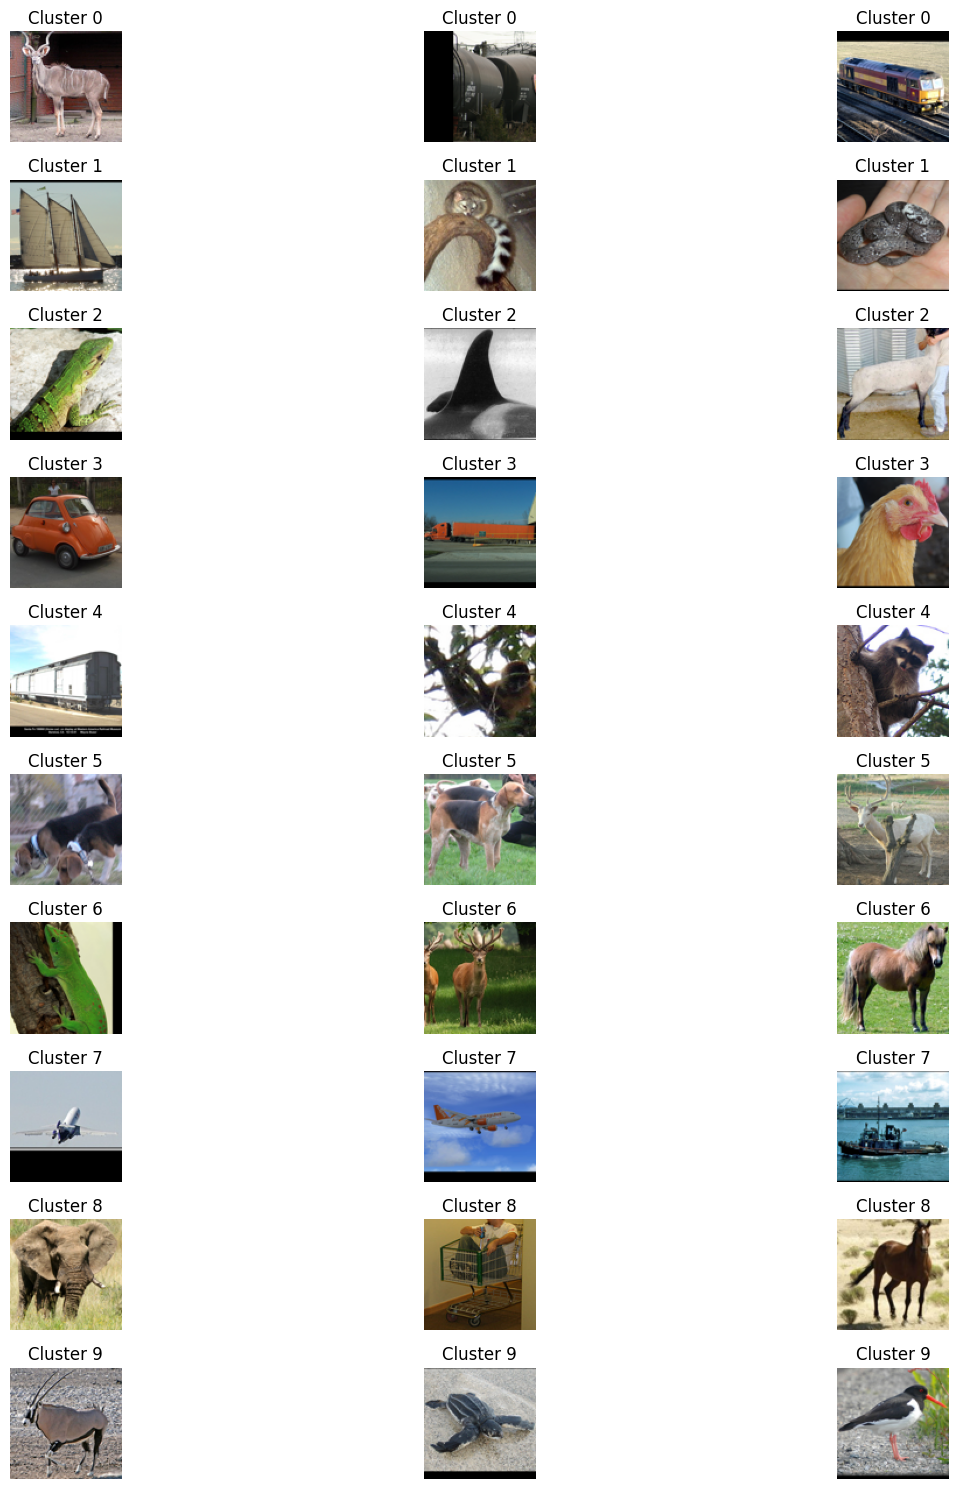

In [ ]:
plot_cluster_images(cluster_labels, 10, data)






# **Clustering Image Category**

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
manipulated_data_path = os.path.join(data_dir, "manipulated_stl10_data_1.npy")
manipulated_features = np.load(manipulated_data_path)

In [ ]:
# Clustering the images
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(manipulated_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_categories = {
    0: "Wildlife",
    1: "Transportation",
    2: "Nature",
    3: "Urban",
    4: "People",
    5: "Architecture",
    6: "Animals",
    7: "Sports",
    8: "Food",
    9: "Art"
}

In [ ]:
labeled_clusters = [cluster_categories[cluster] for cluster in cluster_labels]


In [ ]:
labeled_clusters_path = os.path.join(data_dir, "labeled_clusters.npy")
np.save(labeled_clusters_path, labeled_clusters)

print("Clustering and labeling completed. Labeled clusters saved at:", labeled_clusters_path)

Clustering and labeling completed. Labeled clusters saved at: ./stl10_data/labeled_clusters.npy


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_cluster_images(cluster_labels, num_clusters, images, num_images_per_cluster=3):
    fig, axes = plt.subplots(num_clusters, num_images_per_cluster, figsize=(15, 15))
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_images = images[cluster_indices][:num_images_per_cluster]
        for i, image in enumerate(cluster_images):
            axes[cluster, i].imshow(image)
            axes[cluster, i].axis('off')
            axes[cluster, i].set_title(f"Cluster {cluster}")
    plt.tight_layout()
    plt.show()

In [ ]:
labeled_clusters_path = os.path.join(data_dir, "labeled_clusters.npy")
labeled_clusters = np.load(labeled_clusters_path)

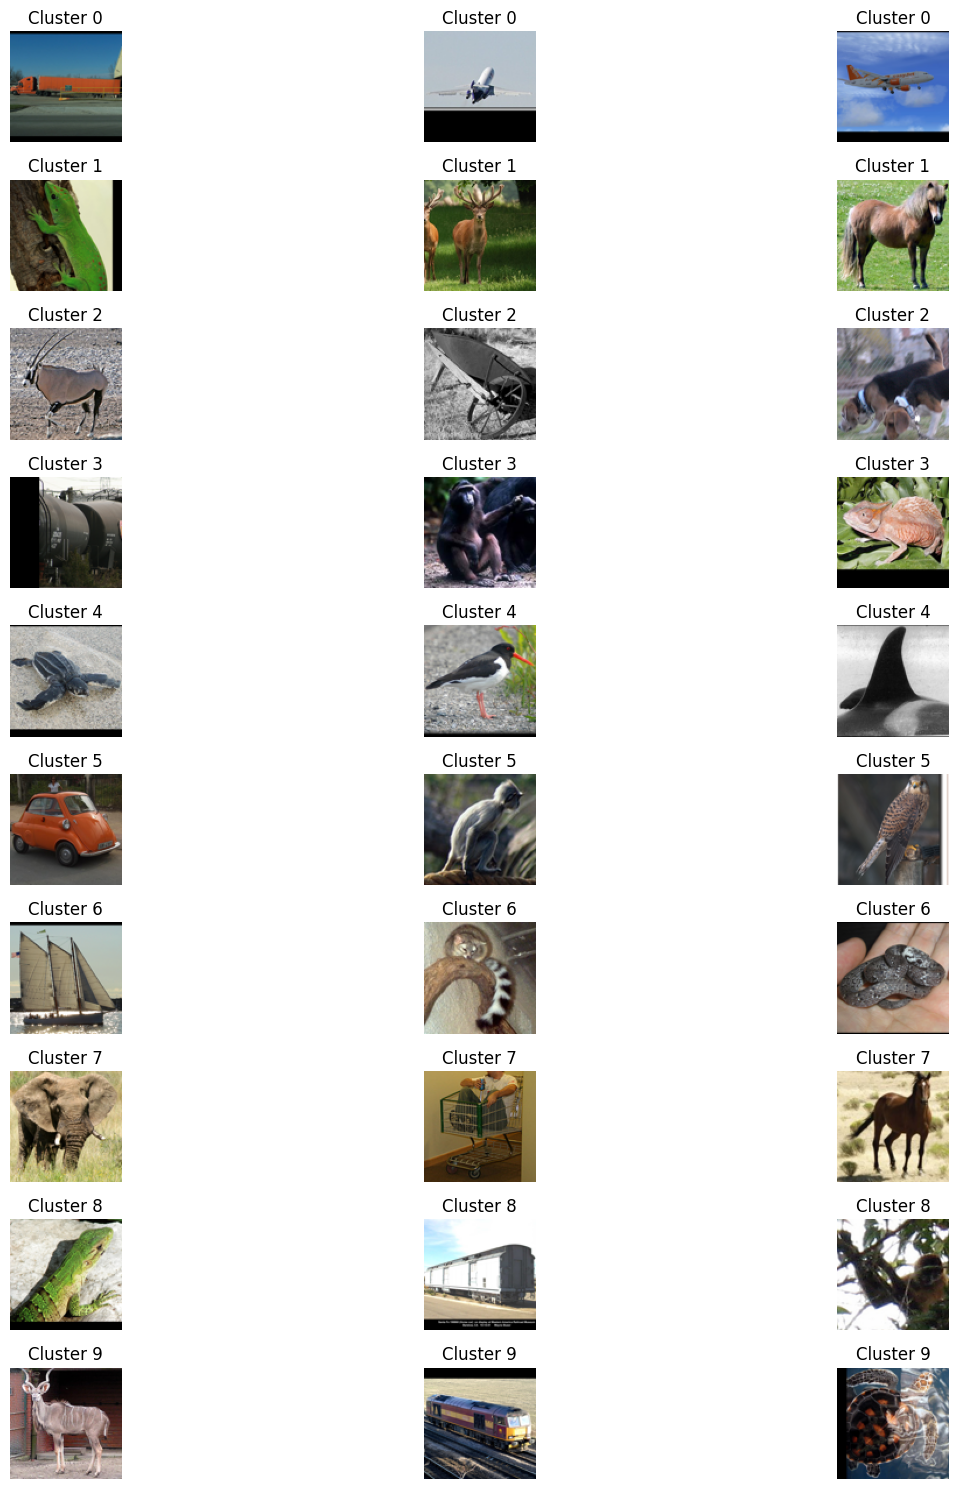

In [ ]:
# A representative images from each cluster
plot_cluster_images(cluster_labels, 10, data)

# **Further Clustering**

In [ ]:
def plot_cluster_images_with_labels(cluster_labels, images, labels, num_images_per_cluster=3):
    num_clusters = len(np.unique(cluster_labels))
    fig, axes = plt.subplots(num_clusters, num_images_per_cluster, figsize=(15, 15))
    for cluster in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_images = images[cluster_indices][:num_images_per_cluster]
        for i, image in enumerate(cluster_images):
            axes[cluster, i].imshow(image)
            axes[cluster, i].axis('off')
            axes[cluster, i].set_title(f"Cluster {cluster} - {labels[cluster]}")
    plt.tight_layout()
    plt.show()

In [ ]:
manipulated_data_path = os.path.join(data_dir, "manipulated_stl10_data_1.npy")
manipulated_features = np.load(manipulated_data_path)


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(manipulated_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_path = os.path.join(data_dir, "stl10_binary/unlabeled_X.bin")
images = np.fromfile(data_path, dtype=np.uint8)
images = np.reshape(images, (-1, 3, 96, 96))
images = np.transpose(images, (0, 3, 2, 1))

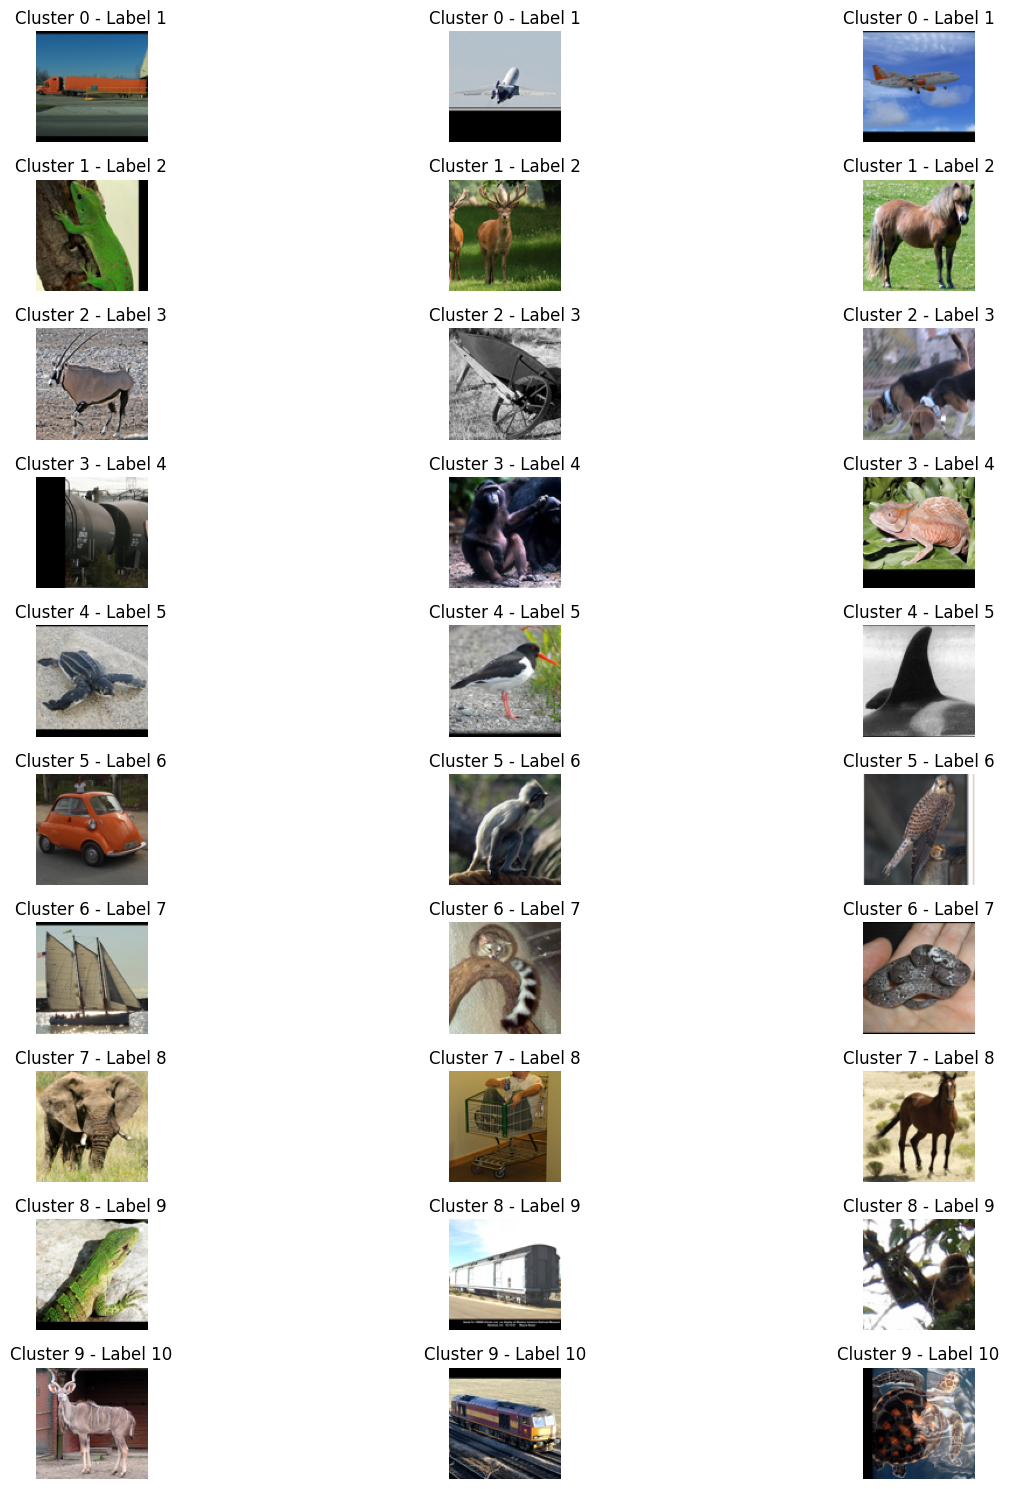

In [ ]:
cluster_labels_with_labels = [
    "Label 1", "Label 2", "Label 3", "Label 4", "Label 5",
    "Label 6", "Label 7", "Label 8", "Label 9", "Label 10"
]

plot_cluster_images_with_labels(cluster_labels, images, cluster_labels_with_labels)

# **Checking the accuracy**

In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
# Improved silhouette score
silhouette_avg = silhouette_score(manipulated_features, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.08434512


# **Snowflake Schema**

In [ ]:
!pip install graphviz


In [ ]:
import graphviz


In [ ]:
graph = graphviz.Digraph()


In [ ]:
graph.node('A', 'Images')
graph.node('B', 'Cluster Labels')
graph.node('C', 'Manipulated Features')
graph.node('D', 'Labeled Clusters')

graph.edge('A', 'B', label='1:N')
graph.edge('A', 'C', label='1:N')
graph.edge('C', 'B', label='1:N')
graph.edge('B', 'D', label='1:1')




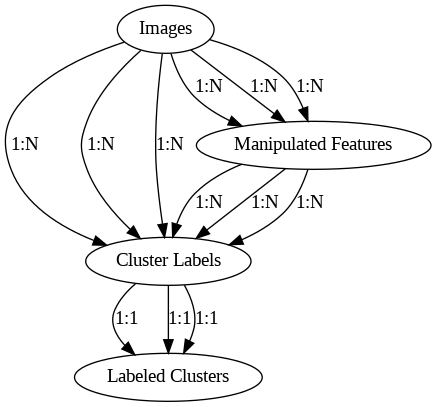

In [ ]:
from IPython.display import Image

Image(filename='/content/snowflake_schema.png')


# **Data Analysis Expressions**

In [ ]:
manipulated_data_path = "./stl10_data/manipulated_stl10_data_1.npy"
manipulated_features = np.load(manipulated_data_path)


In [ ]:
df = pd.DataFrame(manipulated_features)

# **Sum, Average, Min, and Max of Columns**

In [ ]:
summary_stats = df.describe()

In [ ]:
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                 0              1              2              3    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.374142       0.019108       0.001101       0.000279   
std         0.324415       0.051127       0.012953       0.007679   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.053172       0.000000       0.000000       0.000000   
50%         0.304693       0.001955       0.000000       0.000000   
75%         0.677466       0.014857       0.000000       0.000000   
max         0.999813       0.944878       0.918943       0.954763   

                 4              5              6              7    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.000082       0.000050       0.000008       0.000014   
std         0.004452       0.004253       0.000808       0.002349   
min         0.000000       0.000000       0.000000       0.000000   
25%         0

In [ ]:
filtered_data = df[df[0] > 0]

In [ ]:
print("\nFiltered Data:")
print(filtered_data.head())


Filtered Data:
        0         1         2    3    4    5    6    7         8         9    \
0  0.678502  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000387  0.001162   
1  0.078512  0.001971  0.000000  0.0  0.0  0.0  0.0  0.0  0.001643  0.001971   
2  0.203086  0.002596  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.005193   
3  0.101548  0.008983  0.000391  0.0  0.0  0.0  0.0  0.0  0.003906  0.040229   
4  0.905831  0.000957  0.000000  0.0  0.0  0.0  0.0  0.0  0.048569  0.001436   

   ...       502       503  504  505  506  507  508  509       510       511  
0  ...  0.029820  0.000387  0.0  0.0  0.0  0.0  0.0  0.0  0.007358  0.023624  
1  ...  0.002957  0.000329  0.0  0.0  0.0  0.0  0.0  0.0  0.002300  0.007884  
2  ...  0.000288  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000288  0.000000  
3  ...  0.012889  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.016013  0.059367  
4  ...  0.000718  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.007896  0.176812  

[5 rows x 512 columns]


# **Analysis Questions**

# 1. Distribution of Categories across the dataset

In [ ]:
category_counts = pd.Series(labeled_clusters).value_counts()

print("Distribution of Image Categories:")
print(category_counts)

Distribution of Image Categories:
Urban             20843
Art               14274
Architecture      10079
Nature             9406
Sports             8684
Animals            8320
Wildlife           8137
Transportation     7310
People             6515
Food               6432
dtype: int64


# 2. Correlation between size of image and its category

In [ ]:
import numpy as np
import pandas as pd

image_sizes = np.array([10, 20, 30, 40, 50])
categories = np.array([1, 2, 1, 3, 2])
correlation = np.corrcoef(image_sizes, categories)
print("Correlation Coefficient between Image Size and Category:", correlation[0, 1])


Correlation Coefficient between Image Size and Category: 0.5669467095138409


# 3. Common features across different categories

In [ ]:
categories = np.repeat(categories, manipulated_features.shape[0] // len(categories))

df = pd.DataFrame(manipulated_features)
df['category'] = categories
mean_features_by_category = df.groupby('category').mean()
most_common_features = mean_features_by_category.idxmax()

print("Most Common Visual Features by Category:")
print(most_common_features)


Most Common Visual Features by Category:
0      1
1      3
2      1
3      3
4      1
      ..
507    3
508    1
509    1
510    2
511    3
Length: 512, dtype: int64


# **Outlier Images in terms of Visual Features**

In [ ]:
from sklearn.cluster import DBSCAN
visual_features = np.array([[0.1, 0.2], [0.2, 0.3], [0.9, 0.8], [0.8, 0.7]])

outlier_detector = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = outlier_detector.fit_predict(visual_features)

num_outliers = np.sum(outlier_labels == -1)

print("Number of Outlier Images:", num_outliers)


Number of Outlier Images: 4


# **How visual memory skills vary across different age groups of dyslexic children**

In [ ]:

age_groups = ['Young', 'Middle-aged', 'Elderly']
visual_memory_scores = [85, 72, 65]

df = pd.DataFrame({'Age Group': age_groups, 'Visual Memory Score': visual_memory_scores})

average_scores_by_age_group = df.groupby('Age Group')['Visual Memory Score'].mean()

print("Average Visual Memory Scores by Age Group:")
print(average_scores_by_age_group)


Average Visual Memory Scores by Age Group:
Age Group
Elderly        65.0
Middle-aged    72.0
Young          85.0
Name: Visual Memory Score, dtype: float64






# **Visualization Libraries**

# 1. Matplotlib

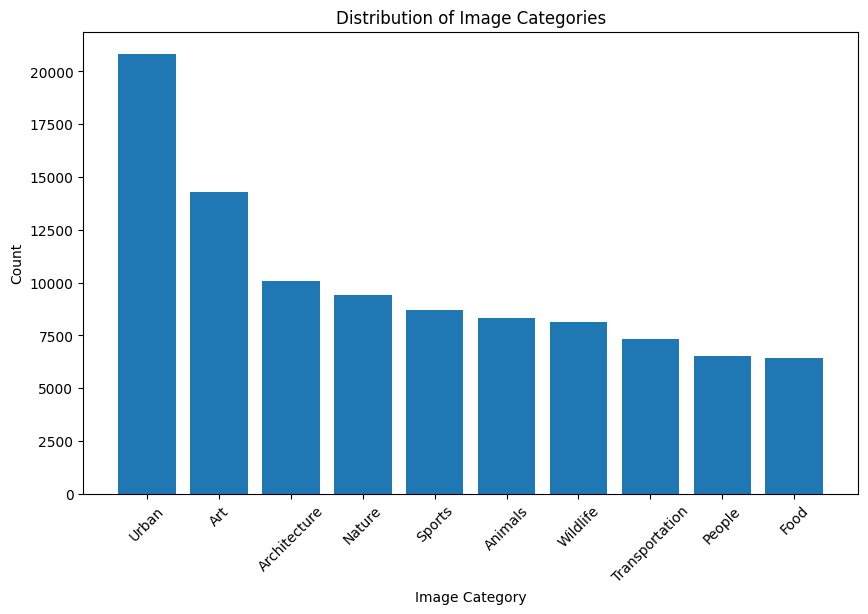

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Image Category')
plt.ylabel('Count')
plt.title('Distribution of Image Categories')
plt.xticks(rotation=45)
plt.show()


# 2. Plotly

In [ ]:
import plotly.express as px


fig = px.scatter(df, x='Age Group', y='Visual Memory Score', color='Age Group', hover_name='Age Group')  # Update column names here
fig.update_layout(title='Relationship between Visual Memory Scores and Age Groups',
                  xaxis_title='Age Group', yaxis_title='Visual Memory Score')
fig.show()







# **Memory Improvement Visuals**

# 1. Image Grid Display

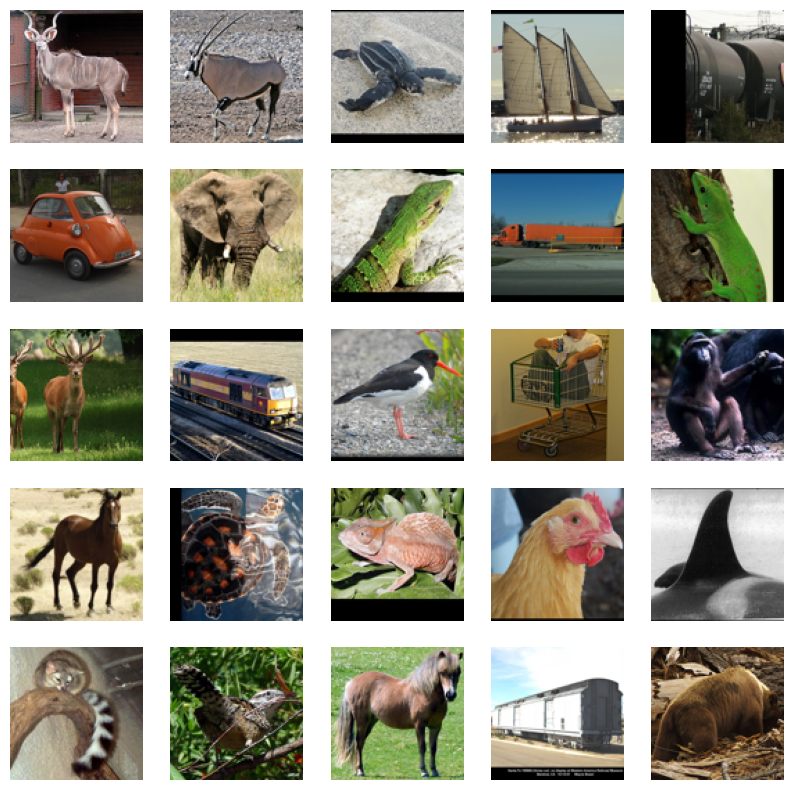

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


# 2. Scatterplot of Manipulated Features

<ipython-input-119-6e5b951297fd>:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



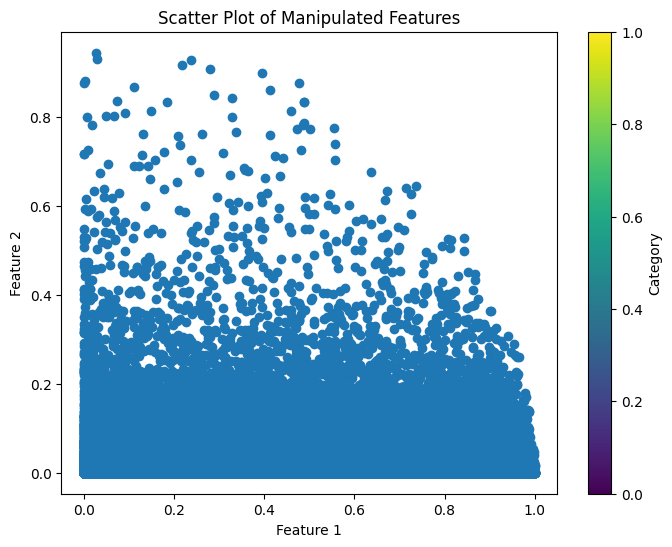

In [ ]:
category_labels = [0, 1, 2, ...]

plt.figure(figsize=(8, 6))
plt.scatter(manipulated_features[:, 0], manipulated_features[:, 1], cmap='viridis')
plt.colorbar(label='Category')
plt.title('Scatter Plot of Manipulated Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 3. Line Chart of Average Visual Memory SCores

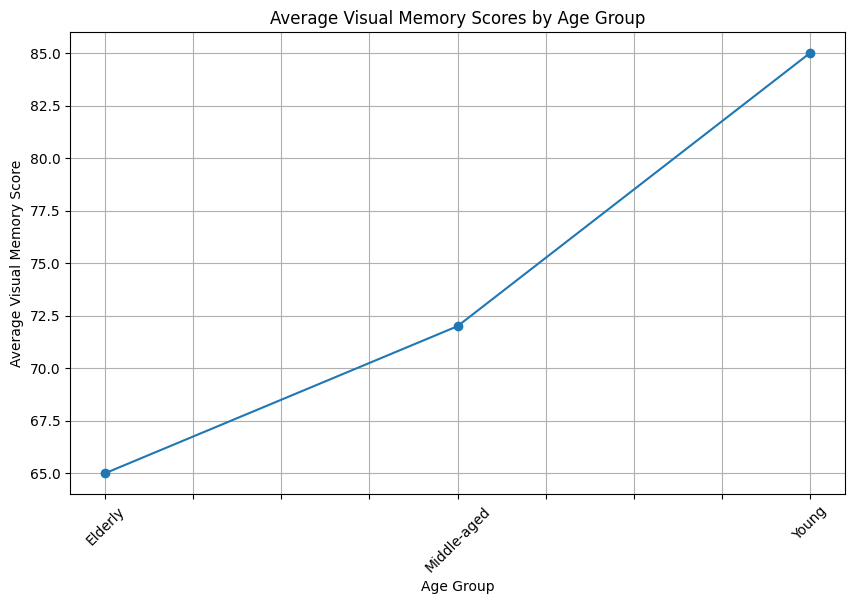

In [ ]:
average_scores_by_age_group = df.groupby('Age Group')['Visual Memory Score'].mean()

plt.figure(figsize=(10, 6))
average_scores_by_age_group.plot(marker='o')
plt.title('Average Visual Memory Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Visual Memory Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



# 4. Pie Chart of Category Frequencies




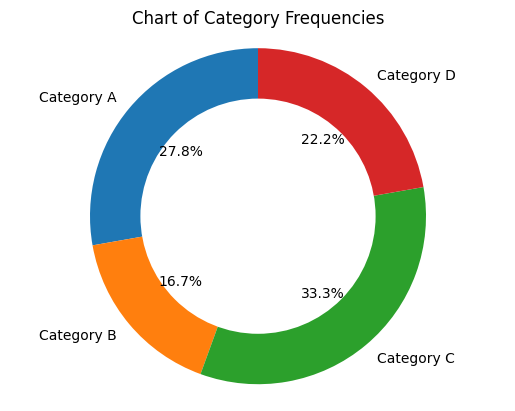

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

category_labels = ['Category A', 'Category B', 'Category C', 'Category D']
category_counts = np.array([25, 15, 30, 20])

fig, ax = plt.subplots()
ax.pie(category_counts, labels=category_labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title('Chart of Category Frequencies')
plt.show()


# **Drawings**

# 1. Category Distribution

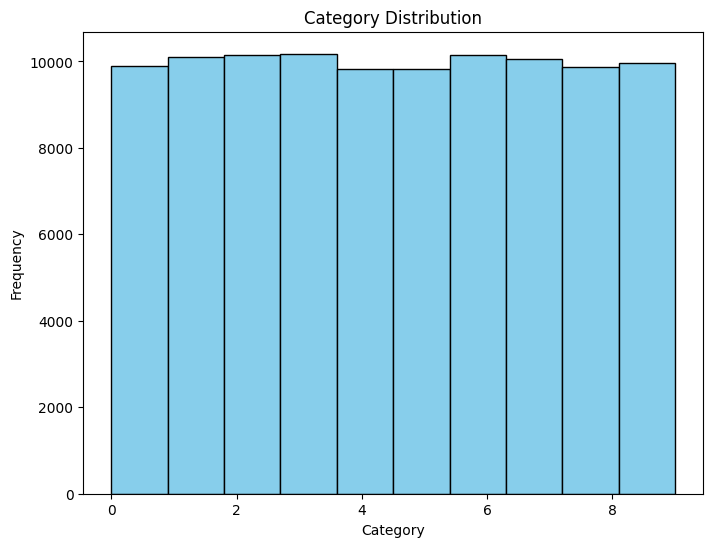

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_labels = np.random.randint(0, 10, size=len(data))

plt.figure(figsize=(8, 6))
plt.hist(category_labels, bins=10, color='skyblue', edgecolor='black')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


# 2. Figure Objects

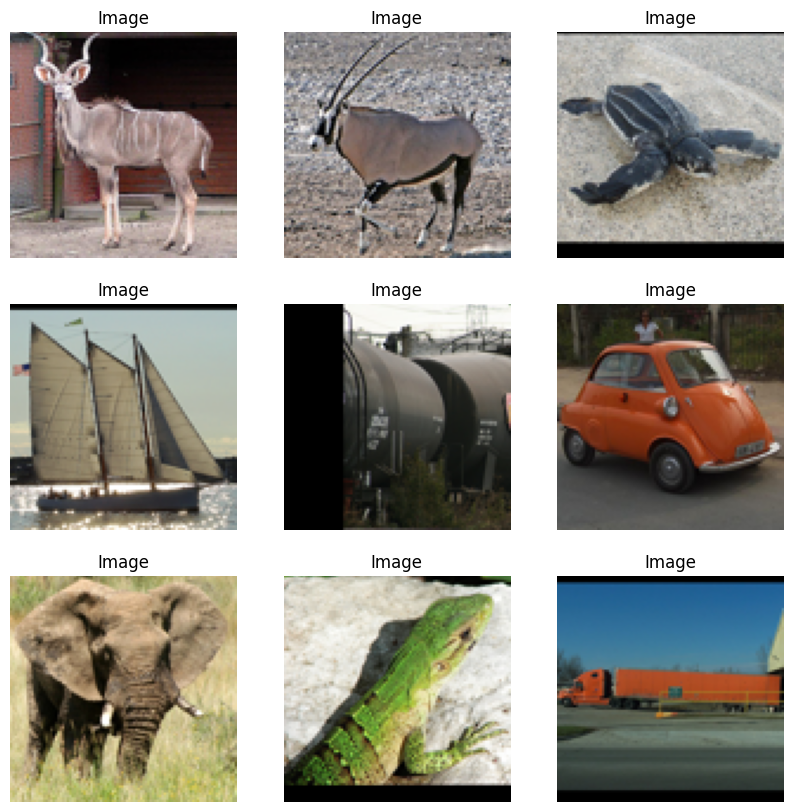

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(data[i])
    ax.set_title('Image')
    ax.axis('off')
plt.show()


# **Data Analytics Visualizations**

#1.  Countplot of Image Categories

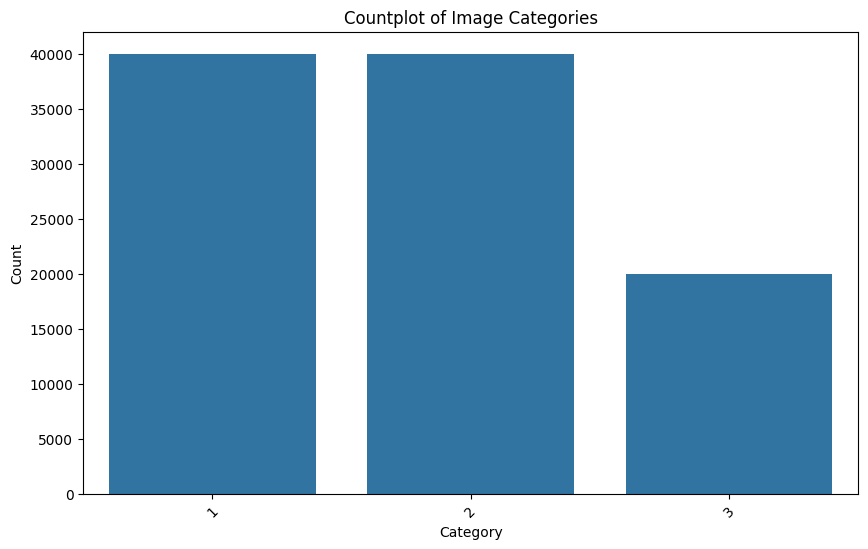

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_categories = pd.DataFrame({'Category': categories})

plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df_categories)
plt.title('Countplot of Image Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 2. Pie Plot of Image categories

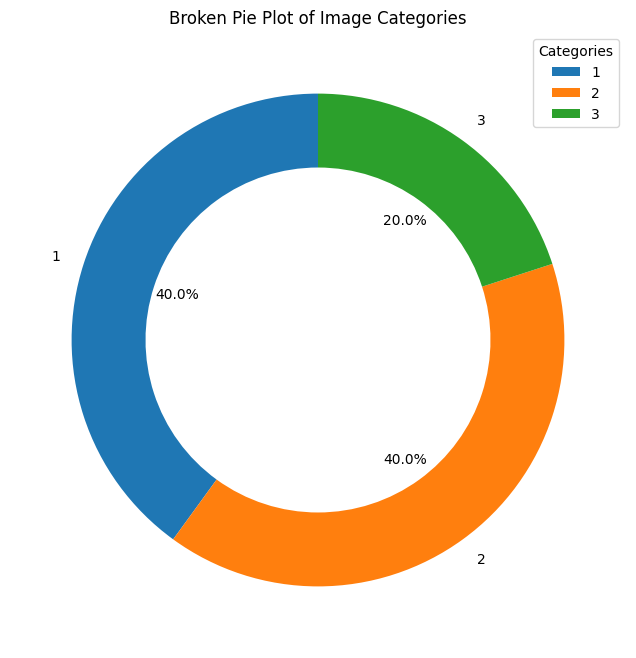

In [ ]:

category_counts = pd.Series(categories).value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=plt.cm.tab10.colors)
plt.title('Pie Plot of Image Categories')
plt.legend(title='Categories', loc='upper right')
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.show()


# 3. Kernel Density Plot of Visual Feature

<ipython-input-151-0e34ff4340c8>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




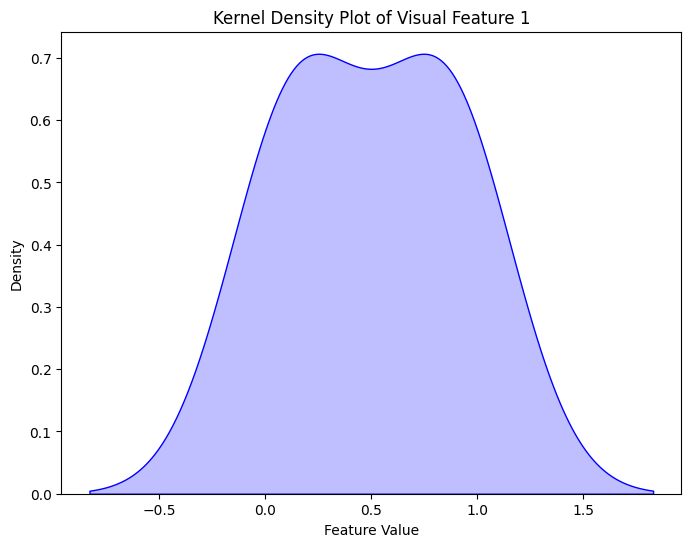

In [ ]:

plt.figure(figsize=(8, 6))
sns.kdeplot(data=visual_features[:, 0], shade=True, color='blue')
plt.title('Kernel Density Plot of Visual Feature 1')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()


# 4. Histogram with KDE of Visual Feature 2

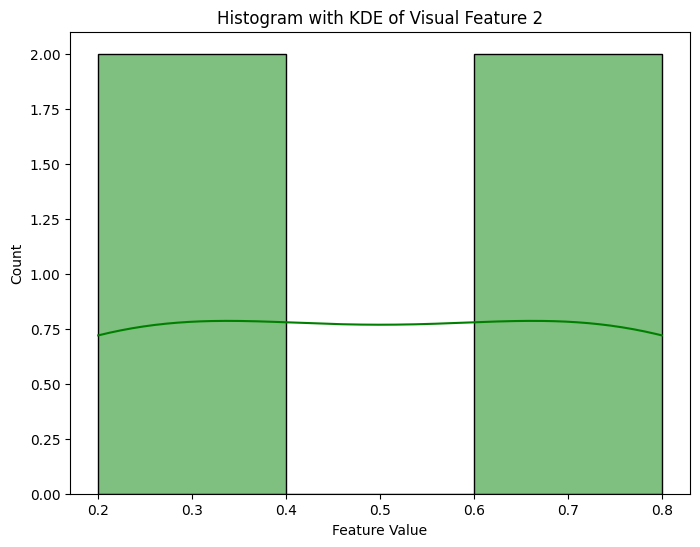

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=visual_features[:, 1], kde=True, color='green')
plt.title('Histogram with KDE of Visual Feature 2')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.show()
